<a href="https://colab.research.google.com/github/aryan-panja/ACE-GFG-ADOBE/blob/main/2_Exploring_Symmetry_in_Curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
file_path = 'frag1.csv'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
  np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
  path_XYs = []
  for i in np.unique(np_path_XYs[:, 0]):
    npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
    XYs = []
    for j in np.unique(npXYs[:, 0]):
      XY = npXYs[npXYs[:, 0] == j][:, 1:]
      XYs.append(XY)
    path_XYs.append(XYs)
  return path_XYs

def plot(paths_XYs):
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    plt.savefig('output.png', format='png')
    plt.show()

In [ ]:
def draw_symmetry_lines(img, cx, cy):
    height, width = img.shape[:2]

    # Draw vertical line
    cv2.line(img, (cx, 0), (cx, height), (0, 255, 0), 1)

    # Draw horizontal line
    cv2.line(img, (0, cy), (width, cy), (0, 255, 0), 1)

    # Draw diagonal line (45 degrees)
    diag1_start = (max(cx - cy, 0), max(cy - cx, 0))
    diag1_end = (min(cx + (height - cy), width), min(cy + (width - cx), height))
    cv2.line(img, diag1_start, diag1_end, (0, 255, 0), 1)

    # Draw diagonal line (135 degrees)
    diag2_start = (max(cx - (height - cy), 0), min(cy + cx, height))
    diag2_end = (min(cx + cy, width), max(cy - (width - cx), 0))
    cv2.line(img, diag2_start, diag2_end, (0, 255, 0), 1)

In [ ]:
from google.colab.patches import cv2_imshow


def find_lines_of_symmetry(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image {image_path}")
        return

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image to draw lines of symmetry
    symmetry_img = img.copy()

    for contour in contours:
        # Calculate image moments of the contour
        M = cv2.moments(contour)

        if M['m00'] != 0:
            # Calculate the center of the contour
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])

            # Draw lines of symmetry
            draw_symmetry_lines(symmetry_img, cx, cy)

    # Save or display the result
    output_path = 'output_symmetry.png'
    cv2.imwrite(output_path, symmetry_img)
    # cv2.imshow('Symmetry Lines', symmetry_img)
    cv2_imshow(symmetry_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
path_XYs = read_csv(file_path)
plot(path_XYs)

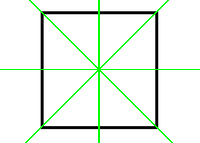

In [ ]:
find_lines_of_symmetry('square.png')